In [ ]:
from tkinter import filedialog
import matplotlib.pyplot as plt
import pandas as pd

def improvement_line_plot(block_size):
    file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
    df = pd.read_csv(file_path, header=None)

    df['TimePerItem_X'] = df.iloc[:, 1] / df.iloc[:, 0]
    df['TimePerItem_AG'] = df.iloc[:, 2] / df.iloc[:, 0]
    df['TimePerItem_AP'] = df.iloc[:, 3] / df.iloc[:, 0]

    if block_size == 0:
        block_size = len(df)
        
    df_grouped = df.groupby(df.index // block_size)
    avg_tpi_x = df_grouped['TimePerItem_X'].mean()
    avg_tpi_ag = df_grouped['TimePerItem_AG'].mean()
    avg_tpi_ap = df_grouped['TimePerItem_AP'].mean()

    plt.figure(figsize=(10, 6))

    # Plot the grouped data using group labels as x-values
    plt.plot(avg_tpi_x.index * block_size + 1, avg_tpi_x, label='Setup X (no algorithm)', alpha=0.3, color='grey')
    plt.plot(avg_tpi_ag.index * block_size + 1, avg_tpi_ag, label='ML-DProSA (agglomerative)', alpha=0.3, color='orange')
    plt.plot(avg_tpi_ap.index * block_size + 1, avg_tpi_ap, label='ML-DProSA (affinity propagation)', alpha=0.3, color='green')

    plt.title('Setup X vs DProSA-AG vs DProSA-AP Performance')
    plt.xlabel(f'Averaged every {block_size} shoppers')
    plt.ylabel('Average time per item')
    plt.legend()
    plt.grid(True)

    plt.show()


improvement_line_plot(10)

2023-11-30 19:12:26.560 Python[80504:2008846] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


Average Time per Item for Setup X:
0    19.021479
1    19.113924
Name: TimePerItem_X, dtype: float64

Average Time per Item for DProSA-AG:
0    19.123472
1    19.287822
Name: TimePerItem_AG, dtype: float64

Average Time per Item for DProSA-AP:
0    18.970338
1    19.027863
Name: TimePerItem_AP, dtype: float64

Block 1 - Setup X: 19.021479233512704, DProSA-AG: 19.123472488044868, DProSA-AP: 18.970338096825397

Block 2 - Setup X: 19.113924188783233, DProSA-AG: 19.287822483383703, DProSA-AP: 19.02786291050666


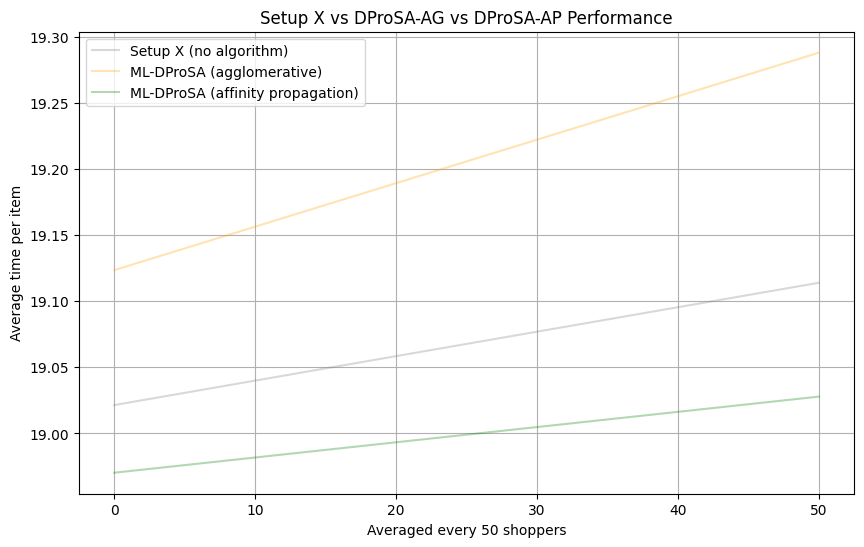

In [1]:
from tkinter import filedialog
import matplotlib.pyplot as plt
import pandas as pd
    
def improvement_line_plot(block_size):
    file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
    df = pd.read_csv(file_path, header=None)


    df['TimePerItem_X'] = df.iloc[:, 1] / df.iloc[:, 0]
    df['TimePerItem_AG'] = df.iloc[:, 2] / df.iloc[:, 0]
    df['TimePerItem_AP'] = df.iloc[:, 3] / df.iloc[:, 0]

    if block_size >= len(df) or block_size == 0:
        block_size = 1
        
    df_grouped = df.groupby(df.index // block_size)
    avg_tpi_x = df_grouped['TimePerItem_X'].mean()
    avg_tpi_ag = df_grouped['TimePerItem_AG'].mean()
    avg_tpi_ap = df_grouped['TimePerItem_AP'].mean()

    print("Average Time per Item for Setup X:")
    print(avg_tpi_x)
    print("\nAverage Time per Item for DProSA-AG:")
    print(avg_tpi_ag)
    print("\nAverage Time per Item for DProSA-AP:")
    print(avg_tpi_ap)

    # Print the average per block in the console
    for i, (avg_x, avg_ag, avg_ap) in enumerate(zip(avg_tpi_x, avg_tpi_ag, avg_tpi_ap), start=1):
        print(f"\nBlock {i} - Setup X: {avg_x}, DProSA-AG: {avg_ag}, DProSA-AP: {avg_ap}")

    plt.figure(figsize=(10, 6))

    # Plot the grouped data using group labels as x-values
    plt.plot(avg_tpi_x.index * block_size, avg_tpi_x, label='Setup X (no algorithm)', alpha=0.3, color='grey')
    plt.plot(avg_tpi_ag.index * block_size, avg_tpi_ag, label='ML-DProSA (agglomerative)', alpha=0.3, color='orange')
    plt.plot(avg_tpi_ap.index * block_size, avg_tpi_ap, label='ML-DProSA (affinity propagation)', alpha=0.3, color='green')

    plt.title('Setup X vs DProSA-AG vs DProSA-AP Performance')
    plt.xlabel(f'Averaged every {block_size} shoppers')
    plt.ylabel('Average time per item')
    plt.legend()
    plt.grid(True)

    plt.show()


improvement_line_plot(50)